# Particle Swarm Optimization (PSO)

## Convex vs Non-convex
![](convex.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define 2D Rastrigin
def rastrigin_2d(X, Y):
    A = 10
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

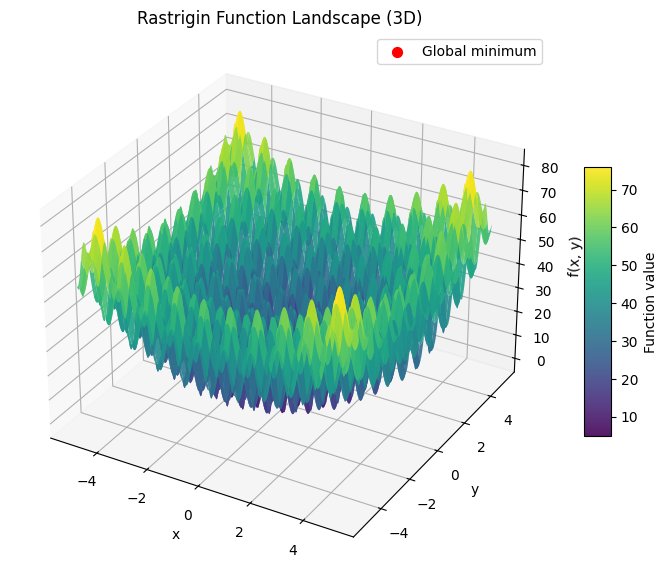

In [3]:
# Create mesh grid
x = np.linspace(-5.12, 5.12, 200)
y = np.linspace(-5.12, 5.12, 200)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)

# Plot 3D surface
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_title("Rastrigin Function Landscape (3D)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label="Function value")

# Mark the global minimum at (0,0)
ax.scatter(0, 0, rastrigin_2d(0, 0), color='red', s=50, label='Global minimum')
ax.legend()

plt.show()

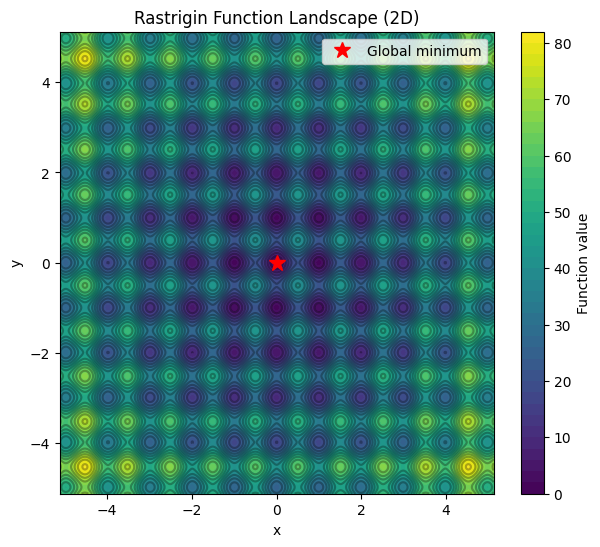

In [4]:
# Create mesh grid
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin_2d(X, Y)

# Plot contour + color map
plt.figure(figsize=(7, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(contour, label="Function value")
plt.contour(X, Y, Z, levels=20, colors='black', alpha=0.3)

# Mark the global minimum
plt.plot(0, 0, "r*", markersize=12, label="Global minimum")

plt.title("Rastrigin Function Landscape (2D)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Particle Swarm Optimization (PSO) Equations

imgae by James Wainscoat
![](flock.jpg)

1. **Velocity Update**:

$$
\mathbf{v}_i(t+1) = w \cdot \mathbf{v}_i(t) 
+ c_1 r_1 \big( \mathbf{p}_i - \mathbf{x}_i(t) \big) 
+ c_2 r_2 \big( \mathbf{g} - \mathbf{x}_i(t) \big)
$$

where:  
- $ \mathbf{v}_i(t) $ = velocity of particle $ i $ at iteration $ t $  
- $ w $ = inertia weight  
- $ c_1, c_2 $ = cognitive & social coefficients  
- $ r_1, r_2 \sim U(0, 1) $ = random numbers  
- $ \mathbf{p}_i $ = personal best position of particle $ i $  
- $ \mathbf{g} $ = global best position  

---

2. **Position Update**:

$$
\mathbf{x}_i(t+1) = \mathbf{x}_i(t) + \mathbf{v}_i(t+1)
$$

---

3. **Personal Best Update**:

$$
\mathbf{p}_i \leftarrow
\begin{cases}
\mathbf{x}_i(t+1), & \text{if } f(\mathbf{x}_i(t+1)) < f(\mathbf{p}_i) \\
\mathbf{p}_i, & \text{otherwise}
\end{cases}
$$

---

4. **Global Best Update**:

$$
\mathbf{g} \leftarrow \arg\min_{\mathbf{p}_i} f(\mathbf{p}_i)
$$


In [5]:
import pyswarms as ps

2025-08-11 18:18:50,638 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.000123
2025-08-11 18:18:50,719 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00012301204608888838, best pos: [-0.0007544  -0.00022566]



Best cost: 0.00012301204608888838
Best position: [-0.0007544  -0.00022566]


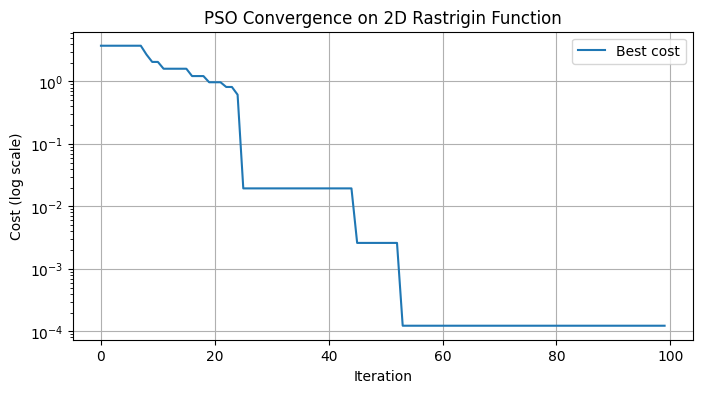

In [6]:
# --- Define the Rastrigin function ---
def rastrigin(x):
    A = 10
    return A * x.shape[1] + np.sum(x**2 - A * np.cos(2 * np.pi * x), axis=1)

# --- Problem settings ---
dim = 2  # 2D Rastrigin
bounds = (np.full(dim, -5.12), np.full(dim, 5.12))
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.9}

# --- Create PSO optimizer ---
optimizer = ps.single.GlobalBestPSO(
    n_particles=30,
    dimensions=dim,
    options=options,
    bounds=bounds
)

# --- Run optimization ---
best_cost, best_pos = optimizer.optimize(rastrigin, iters=100, verbose=True)

print("\nBest cost:", best_cost)
print("Best position:", best_pos)

# --- Plot convergence ---
plt.figure(figsize=(8, 4))
plt.plot(optimizer.cost_history, label="Best cost")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Cost (log scale)")
plt.title("PSO Convergence on 2D Rastrigin Function")
plt.grid(True)
plt.legend()
plt.show()


### Particle Swarm Optimization (PSO) Vector/Matrix Form (2D case)

Let the position and velocity of particle $i$ at iteration $t$ be:

$$
\mathbf{x}_i(t) = \begin{bmatrix} x_{i1}(t) \\ x_{i2}(t) \end{bmatrix}, \quad
\mathbf{v}_i(t) = \begin{bmatrix} v_{i1}(t) \\ v_{i2}(t) \end{bmatrix}
$$

The update equations are:

1. **Velocity update:**

$$
\mathbf{v}_i(t+1) = w \mathbf{v}_i(t) 
+ c_1 r_1 \big(\mathbf{p}_i - \mathbf{x}_i(t)\big) 
+ c_2 r_2 \big(\mathbf{g} - \mathbf{x}_i(t)\big)
$$

where $r_1, r_2 \sim U(0,1)$ are scalar random variables sampled independently for each dimension.

2. **Position update:**

$$
\mathbf{x}_i(t+1) = \mathbf{x}_i(t) + \mathbf{v}_i(t+1)
$$

3. **Personal best update:**

$$
\mathbf{p}_i \leftarrow
\begin{cases}
\mathbf{x}_i(t+1), & \text{if } f(\mathbf{x}_i(t+1)) < f(\mathbf{p}_i) \\
\mathbf{p}_i, & \text{otherwise}
\end{cases}
$$

4. **Global best update:**

$$
\mathbf{g} \leftarrow \arg\min_{\mathbf{p}_i} f(\mathbf{p}_i)
$$

---

**Note:** All vectors $\mathbf{x}_i(t)$, $\mathbf{v}_i(t)$, $\mathbf{p}_i$, and $\mathbf{g}$ are $2 \times 1$ column vectors representing positions or velocities in the 2D search space.
